#**Reinforcement Learning** 

#**Upper Confidence Bound** 


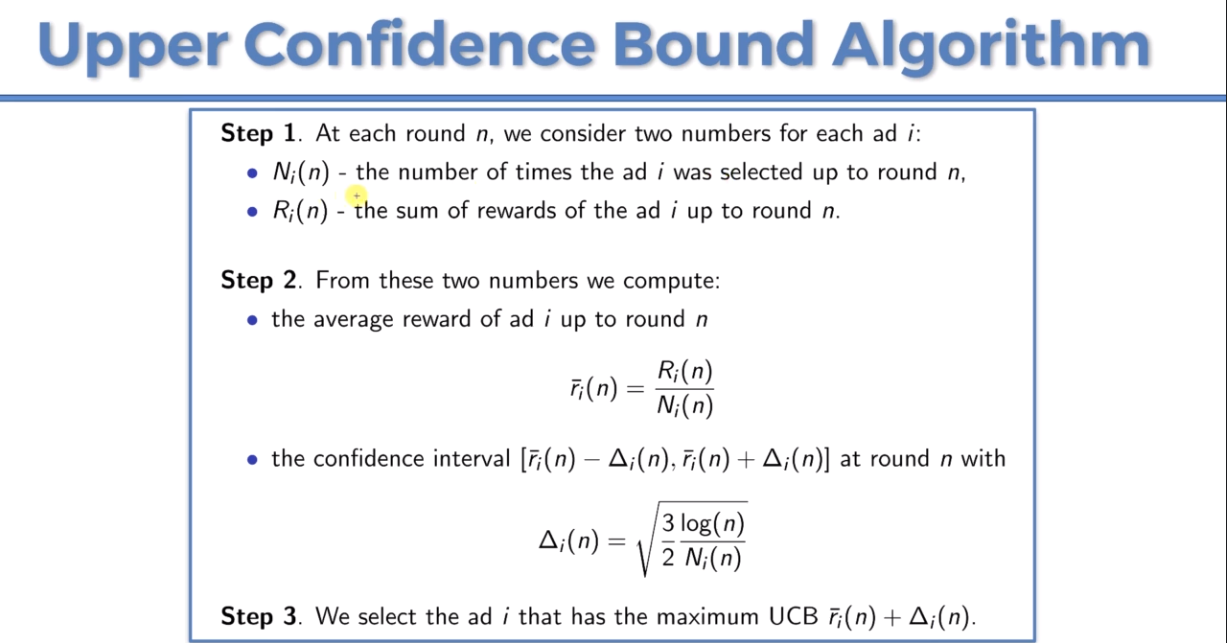

In [67]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

**The data set has the same conversion rate**

In [68]:
data = pd.read_csv('/content/Ads_CTR_Optimisation.csv')
data.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [69]:
data.sum()

Ad 1     1703
Ad 2     1295
Ad 3      728
Ad 4     1196
Ad 5     2695
Ad 6      126
Ad 7     1112
Ad 8     2091
Ad 9      952
Ad 10     489
dtype: int64

In [70]:
data.shape

(10000, 10)

The data set is Simulation m we know on which ads the user will click 

##**Implementing UCB**

In [71]:
import math 
N = 10000         #the number of times ad i was setected up to n round 
d = 10            #the number of ads 
ads_selected = []
number_of_selections = [0]*d #each time the add selected it will be increment 
sums_of_rewards = [0]*d
total_reward = 0

for n in range(0,N):
  ad = 0 
  max_upper_bound = 0 
  for i in range(0,d):
    if number_of_selections[i] > 0:
      average_reward = sums_of_rewards[i] / number_of_selections[i] # the average rewards 
      delta_i = math.sqrt(3/2*math.log(n+1) /number_of_selections[i])
      upper_bound = average_reward + delta_i
    else:
      upper_bound = 1e400
    if upper_bound > max_upper_bound:
       max_upper_bound = upper_bound
       ad = i 
  ads_selected.append(ad)
  number_of_selections[ad] +=1
  reward = sums_of_rewards[ad]+data.values[n,ad]
  sums_of_rewards[ad] = reward
  total_reward = total_reward + reward

##**Visualizing the Results**

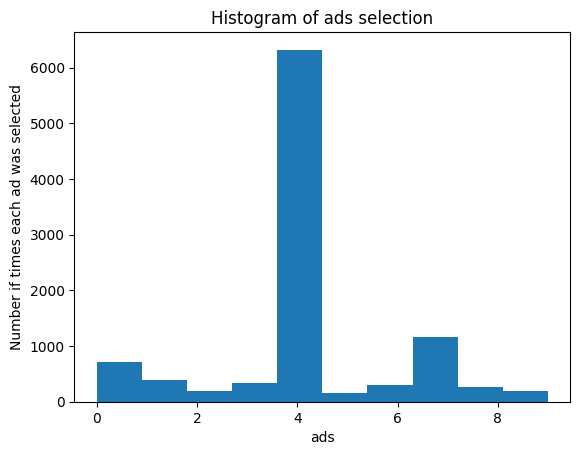

In [72]:
# for i in range(0,9):
plt.hist(ads_selected)
plt.title('Histogram of ads selection')
plt.xlabel('ads')
plt.ylabel('Number if times each ad was selected')

plt.show() 